In [79]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sales_April_2019.csv") #Read file

#Cleaning the data

df.dropna(how='all', inplace=True) # Drops rows where all values are NaN
df.reset_index(drop=True, inplace=True)  # reset index

#Converting Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')


df = df[df['Order Date'].dt.strftime('%Y-%m') == '2019-04']
#Prints the first 5 rows of the table
df.head()
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [80]:
# Convert to appropriate numeric types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']  # Compute total revenue

total_sales = df['Total Sales'].sum()  # Sum up all sales
print(f"Total Sales in April 2019: ${total_sales:,.2f}")  # Format as currency



Total Sales in April 2019: $3,385,499.82


/var/folders/sq/dtrw9r5933739c0yq43nkr5w0000gn/T/ipykernel_8989/3689959273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Total Sales',data=city_sales, palette="coolwarm", legend=False)


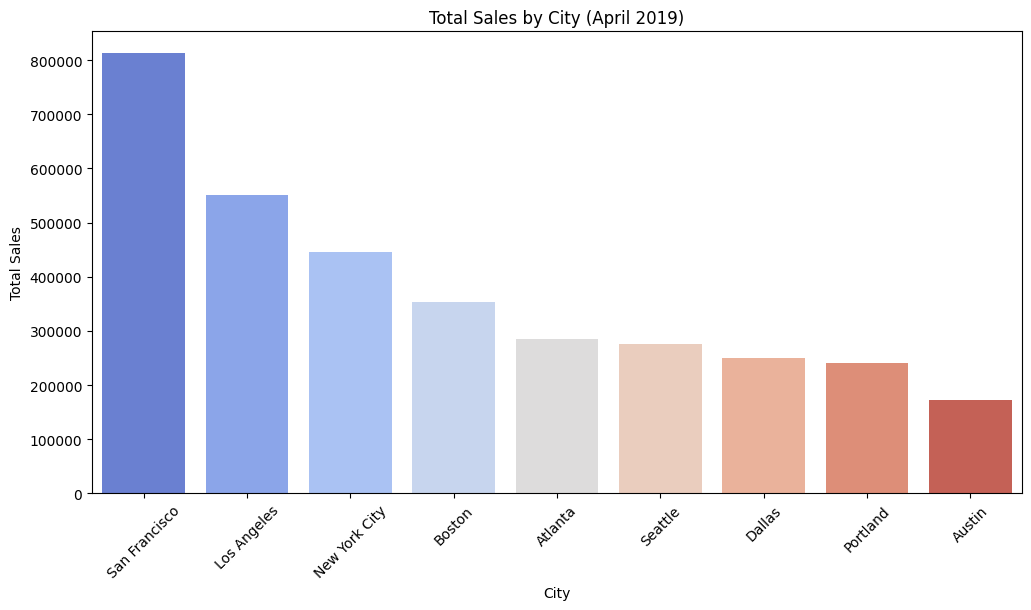

In [81]:
#Plot Sales by City

df['City'] = df['Purchase Address'].apply(lambda x : x.split(", ")[1] if pd.notna(x) else None) #Extract city from the address

city_sales = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Total Sales',data=city_sales, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Total Sales by City (April 2019)")
plt.show()

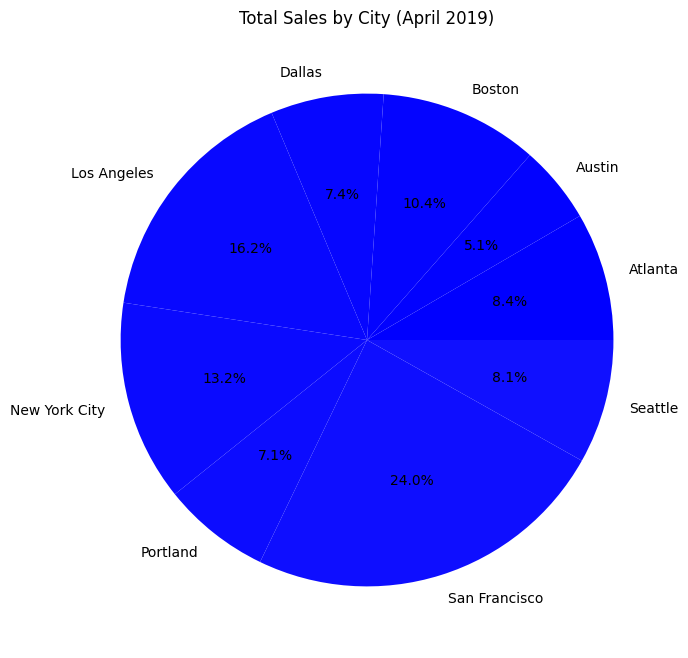

In [82]:
#Create piechart to demonstrate the total sales of each city

import matplotlib.pyplot as plt

# Assuming `city_sales` is already created as a DataFrame
city_sales = df.groupby('City')['Total Sales'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_sales['Total Sales'], labels=city_sales['City'], autopct='%1.1f%%', colors=plt.cm.bwr(range(len(city_sales))))

# Add a title
plt.title("Total Sales by City (April 2019)")
plt.show()

/var/folders/sq/dtrw9r5933739c0yq43nkr5w0000gn/T/ipykernel_8989/491210112.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Product', y='Total Sales', data=product_sales, palette=palette)


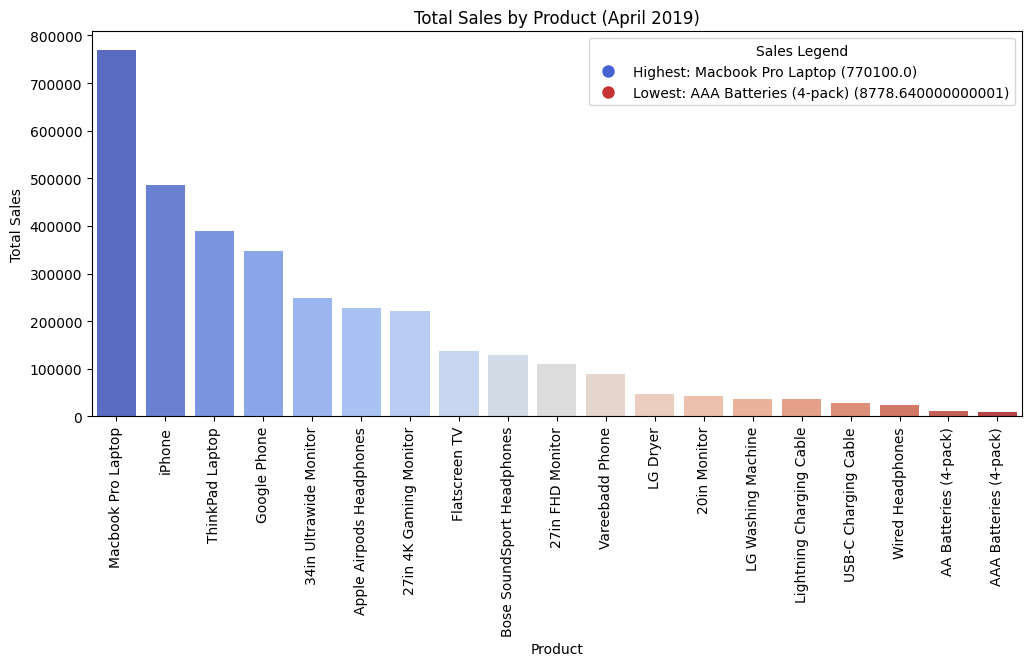

In [83]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has 'Product' and 'Total Sales' columns.
# Group by Product to get total sales per product
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).reset_index()

# Identify the highest and lowest selling products
highest_sales_product = product_sales.loc[product_sales['Total Sales'].idxmax()]
lowest_sales_product = product_sales.loc[product_sales['Total Sales'].idxmin()]

# Create a color palette with enough colors for all products
palette = sns.color_palette("coolwarm", n_colors=len(product_sales))

# Create a bar plot
plt.figure(figsize=(12,5))
barplot = sns.barplot(x='Product', y='Total Sales', data=product_sales, palette=palette)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product (April 2019)")

# Manually specify handles for the highest and lowest-selling products
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[product_sales['Product'].tolist().index(highest_sales_product['Product'])], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[product_sales['Product'].tolist().index(lowest_sales_product['Product'])], markersize=10)
]

# Create the legend labels
labels = [
    f"Highest: {highest_sales_product['Product']} ({highest_sales_product['Total Sales']})",
    f"Lowest: {lowest_sales_product['Product']} ({lowest_sales_product['Total Sales']})"
]

# Add the custom legend
plt.legend(handles=handles, labels=labels, title="Sales Legend")

# Show the plot
plt.show()


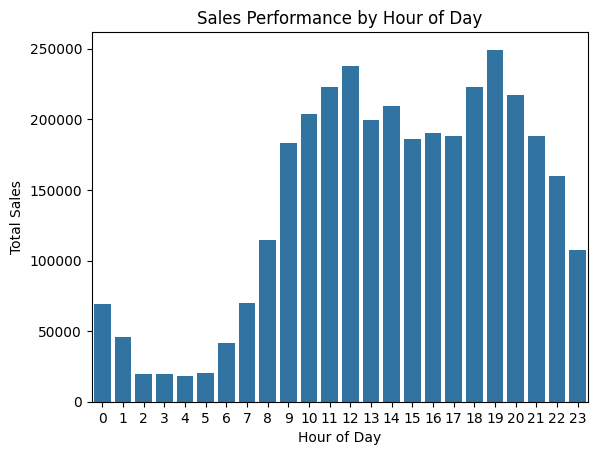

In [84]:
df['Order Hour'] = df['Order Date'].dt.hour
sales_by_hour = df.groupby('Order Hour')['Total Sales'].sum().reset_index()

sns.barplot(x='Order Hour', y='Total Sales', data=sales_by_hour)
plt.title('Sales Performance by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()


Insights:
San Francisco Had the Highest Sales 🌁

High Purchasing Power: San Francisco is an affluent place known for purchasing premium products.
Business & Productivity Needs: Many buyers might be purchasing laptops for work, startups, or creative industries.
 MacBook Pro Was the Best-Selling Product 💻

Premium Product Appeal: The MacBook Pro’s strong sales suggest a preference for high-end, reliable devices.
Work & Education Demand: Professionals, students, and businesses may have been driving these purchases.
Apple’s Strong Market Presence: Apple’s dominance in San Francisco aligns with its headquarters being nearby, increasing brand loyalty.
Peak Sales Time: 7 PM ⏰

Post-Work Shopping Behavior: Customers likely browse and purchase products after work hours when they have free time.
Online Shopping Trend: Many purchases might have been made online, as evenings are a common time for e-commerce transactions.
Possible Promotions or Discounts: Some retailers may run special evening deals or flash sales that increase purchasing activity.

Recommendations:
Apple should sell macbooks in tandem with airpods and other apple products. Ads and promos should be focused around 7pm